In [1]:
import pandas as pd
import numpy as np
import os as os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import acessos as ac
import funcionalidade as fc
import re
from pylift import TransformedOutcome
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
query = """
  
select * from customer_sandbox_zone.dados_estudo_mgm_flavia

"""

df = ac.df_athena('flavia-costa', query)

In [3]:
len(df)

1043601

In [4]:
df.dtypes

cpf                          object
tempo_aprovacao             float64
limite_aprovado             float64
ds_risk_type                 object
gender                       object
nr_declared_income          float64
ds_region                    object
flag_autonomo                 int64
max_limite                  float64
max_qtd_if                    int64
avg_utilizado_interno       float64
sum_utilizado_interno       float64
avg_utilizado_mercado       float64
sum_utilizado_mercado       float64
nr_chaves_importantes       float64
nr_antecipacao_fatura       float64
nr_bolso_ativo              float64
nr_trans_mov_conta          float64
nr_purchases_virtual        float64
avg_vl_total_spending       float64
nr_purchases_online         float64
nr_acessos                  float64
nr_acessos_lojawill         float64
flag_mgm                    float64
ordem                         int64
flag_limite_insuficiente      int64
share_of_wallet             float64
dtype: object

In [5]:
df.head()

,cpf,tempo_aprovacao,limite_aprovado,ds_risk_type,gender,nr_declared_income,ds_region,flag_autonomo,max_limite,max_qtd_if,...,nr_trans_mov_conta,nr_purchases_virtual,avg_vl_total_spending,nr_purchases_online,nr_acessos,nr_acessos_lojawill,flag_mgm,ordem,flag_limite_insuficiente,share_of_wallet
0,07575433406,0.0,10000.0,4. Baixo Risco,MALE,2500.0,Nordeste,0,10000.0,4,...,14.0,0.0,2636.853333,1.0,94.0,0.0,1.0,7924,1,0.314804
1,88099610482,2.0,990.0,4. Baixo Risco,FEMALE,2000.0,Nordeste,0,3000.0,7,...,16.0,2.0,2075.054286,296.0,188.0,4.0,1.0,7925,1,0.090465
2,01224554280,3.0,1130.0,3. Medio Risco,MALE,2500.0,Norte,0,2100.0,4,...,49.0,0.0,526.976667,7.0,279.0,0.0,1.0,7926,1,0.342886
3,14746097402,2.0,880.0,4. Baixo Risco,FEMALE,2000.0,Nordeste,1,1200.0,3,...,56.0,2.0,1025.758889,36.0,522.0,4.0,1.0,7927,1,0.634197
4,09552231728,11.0,500.0,3. Medio Risco,MALE,2600.0,Sudeste,0,500.0,8,...,13.0,38.0,187.613333,64.0,136.0,1.0,1.0,7928,1,0.157947


In [6]:
df.isnull().sum()

cpf                              0
tempo_aprovacao               3292
limite_aprovado             138756
ds_risk_type                     0
gender                        9251
nr_declared_income               0
ds_region                        8
flag_autonomo                    0
max_limite                       1
max_qtd_if                       0
avg_utilizado_interno       166757
sum_utilizado_interno       166757
avg_utilizado_mercado       166757
sum_utilizado_mercado       166757
nr_chaves_importantes       430832
nr_antecipacao_fatura       430832
nr_bolso_ativo              430832
nr_trans_mov_conta          430832
nr_purchases_virtual         81637
avg_vl_total_spending        81637
nr_purchases_online          81637
nr_acessos                  500000
nr_acessos_lojawill         500000
flag_mgm                    500000
ordem                            0
flag_limite_insuficiente         0
share_of_wallet             173730
dtype: int64

In [7]:
id_columns = ['cpf', 'ordem']
cat_columns = df.drop(id_columns, axis = 1).select_dtypes('object').columns
num_columns = df.drop(id_columns, axis = 1).select_dtypes(exclude=['object']).columns

In [8]:
df.drop(id_columns, axis=1).describe()

,tempo_aprovacao,limite_aprovado,nr_declared_income,flag_autonomo,max_limite,max_qtd_if,avg_utilizado_interno,sum_utilizado_interno,avg_utilizado_mercado,sum_utilizado_mercado,...,nr_bolso_ativo,nr_trans_mov_conta,nr_purchases_virtual,avg_vl_total_spending,nr_purchases_online,nr_acessos,nr_acessos_lojawill,flag_mgm,flag_limite_insuficiente,share_of_wallet
count,1.040309e+06,904845.000000,1.043601e+06,1.043601e+06,1.043600e+06,1.043601e+06,876844.000000,8.768440e+05,8.768440e+05,8.768440e+05,...,612769.000000,612769.000000,961964.000000,961964.000000,961964.000000,543601.000000,543601.000000,543601.000000,1.043601e+06,869871.000000
mean,1.497504e+01,1289.844499,1.110074e+07,2.723138e-01,2.485911e+03,4.459600e+00,2395.613352,3.155536e+04,1.131543e+04,1.804699e+05,...,0.043791,54.686466,4.379494,1034.163637,41.504508,145.715357,1.143710,0.080208,7.065718e-01,0.340997
std,5.368228e+01,1101.859951,5.874859e+09,4.451508e-01,2.985811e+03,3.672688e+00,4338.823420,8.040003e+04,6.448916e+04,1.593684e+06,...,0.371609,194.654587,28.556927,1559.462463,116.885259,252.322357,4.475684,0.271615,4.553332e-01,0.251563
min,-6.600000e+01,110.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,-442.262308,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000e+00,600.000000,1.000000e-02,0.000000e+00,8.000000e+02,2.000000e+00,536.970000,3.318113e+03,1.057561e+03,7.564000e+03,...,0.000000,6.000000,0.000000,384.360714,2.000000,27.000000,0.000000,0.000000,0.000000e+00,0.128349
50%,2.000000e+00,950.000000,1.500000e+03,0.000000e+00,1.500000e+03,4.000000e+00,1291.640000,1.247734e+04,2.874677e+03,2.786000e+04,...,0.000000,14.000000,0.000000,651.504206,9.000000,82.000000,0.000000,0.000000,1.000000e+00,0.316916
75%,7.000000e+00,1500.000000,3.000000e+03,1.000000e+00,2.900000e+03,6.000000e+00,2702.610000,3.185951e+04,7.823259e+03,9.225600e+04,...,0.000000,42.000000,0.000000,1153.453250,36.000000,173.000000,1.000000,0.000000,1.000000e+00,0.516098
max,1.096000e+03,15000.000000,5.000000e+12,1.000000e+00,2.000000e+05,4.700000e+01,733731.840000,5.567665e+06,1.292487e+07,3.882981e+08,...,48.000000,29750.000000,5135.000000,341943.360000,21592.000000,15120.000000,864.000000,1.000000,1.000000e+00,1.000000


In [9]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace = True)
  elif df[column].dtype == 'string':
    df[column].fillna(df[column].mode()[0], inplace = True)
  elif df[column].dtype != 'object':
    df[column].fillna(df[column].median(), inplace = True)

In [10]:
df.isnull().sum()

cpf                         0
tempo_aprovacao             0
limite_aprovado             0
ds_risk_type                0
gender                      0
nr_declared_income          0
ds_region                   0
flag_autonomo               0
max_limite                  0
max_qtd_if                  0
avg_utilizado_interno       0
sum_utilizado_interno       0
avg_utilizado_mercado       0
sum_utilizado_mercado       0
nr_chaves_importantes       0
nr_antecipacao_fatura       0
nr_bolso_ativo              0
nr_trans_mov_conta          0
nr_purchases_virtual        0
avg_vl_total_spending       0
nr_purchases_online         0
nr_acessos                  0
nr_acessos_lojawill         0
flag_mgm                    0
ordem                       0
flag_limite_insuficiente    0
share_of_wallet             0
dtype: int64

In [11]:
df['flag_mgm'].value_counts()

0.0    1000000
1.0      43601
Name: flag_mgm, dtype: int64

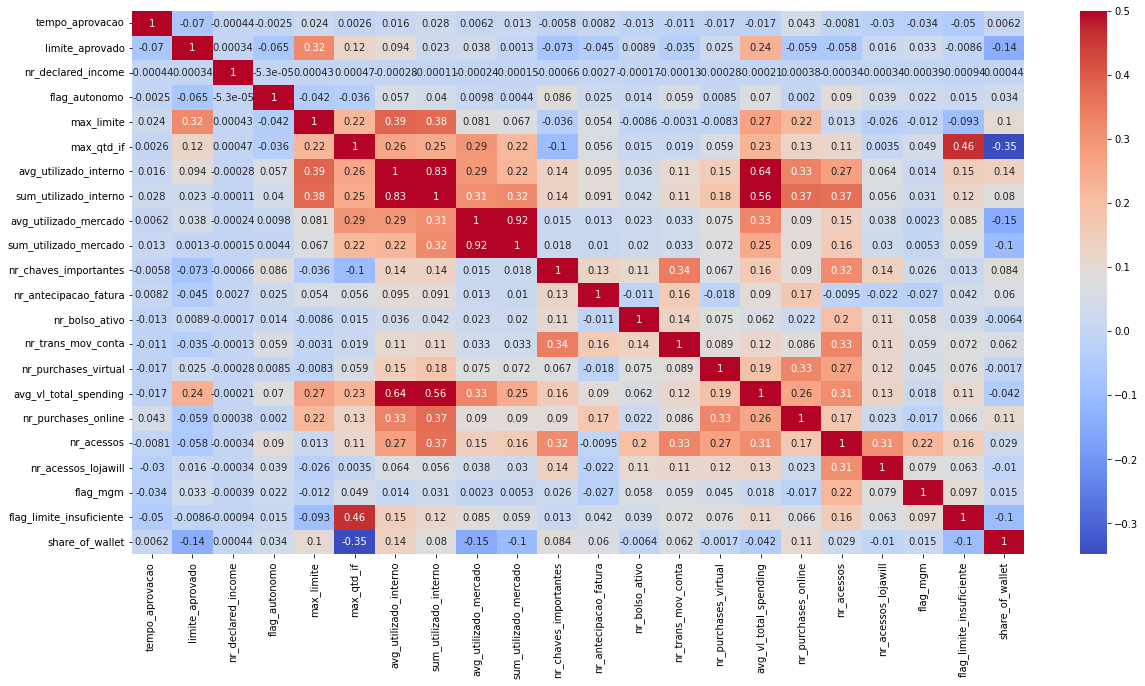

In [12]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(id_columns, axis=1).corr(), annot=True, cmap="coolwarm", vmax=0.5)
plt.show()

In [13]:
cat_columns

Index(['ds_risk_type', 'gender', 'ds_region'], dtype='object')

In [14]:
nao_preditor = ['cpf','ordem' , 'flag_mgm']
target = ['flag_mgm']



In [15]:
df.isnull().sum()

cpf                         0
tempo_aprovacao             0
limite_aprovado             0
ds_risk_type                0
gender                      0
nr_declared_income          0
ds_region                   0
flag_autonomo               0
max_limite                  0
max_qtd_if                  0
avg_utilizado_interno       0
sum_utilizado_interno       0
avg_utilizado_mercado       0
sum_utilizado_mercado       0
nr_chaves_importantes       0
nr_antecipacao_fatura       0
nr_bolso_ativo              0
nr_trans_mov_conta          0
nr_purchases_virtual        0
avg_vl_total_spending       0
nr_purchases_online         0
nr_acessos                  0
nr_acessos_lojawill         0
flag_mgm                    0
ordem                       0
flag_limite_insuficiente    0
share_of_wallet             0
dtype: int64

In [16]:
fc.valid(df, id_columns)

tamanho do dataset:
1043601
valores nulos:
cpf                         0
tempo_aprovacao             0
limite_aprovado             0
ds_risk_type                0
gender                      0
nr_declared_income          0
ds_region                   0
flag_autonomo               0
max_limite                  0
max_qtd_if                  0
avg_utilizado_interno       0
sum_utilizado_interno       0
avg_utilizado_mercado       0
sum_utilizado_mercado       0
nr_chaves_importantes       0
nr_antecipacao_fatura       0
nr_bolso_ativo              0
nr_trans_mov_conta          0
nr_purchases_virtual        0
avg_vl_total_spending       0
nr_purchases_online         0
nr_acessos                  0
nr_acessos_lojawill         0
flag_mgm                    0
ordem                       0
flag_limite_insuficiente    0
share_of_wallet             0
dtype: int64
valores distintos das variaveis categoricas:
ds_risk_type
4
gender
2
ds_region
5
____________________________
tempo_aprovacao
mínimo:


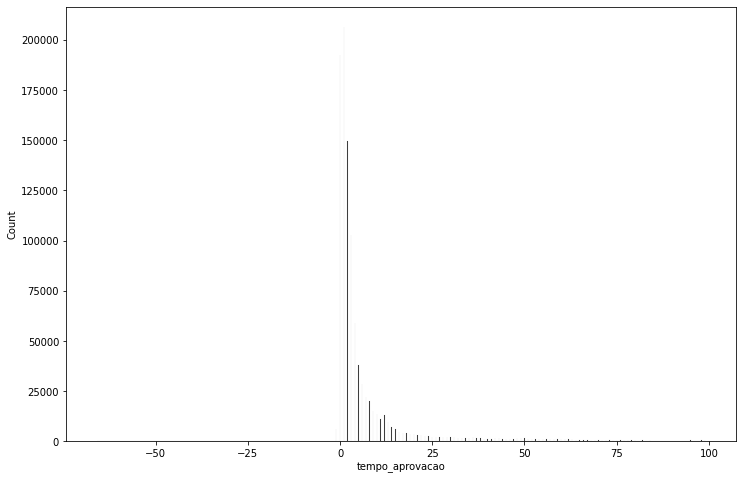

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data = df.query('tempo_aprovacao < 100'), x = 'tempo_aprovacao', color = 'black')
plt.show()

In [18]:
df['flag_autonomo'].value_counts()


0    759414
1    284187
Name: flag_autonomo, dtype: int64

In [19]:
df['nr_bolso_ativo'].value_counts()

0.0     1027584
1.0       10888
2.0        2967
3.0         921
4.0         588
5.0         186
6.0         154
8.0         142
7.0          58
12.0         42
9.0          19
10.0         17
16.0         17
14.0          4
18.0          3
24.0          3
20.0          3
48.0          1
30.0          1
13.0          1
36.0          1
15.0          1
Name: nr_bolso_ativo, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pr
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn import tree

In [21]:
df_model = pd.get_dummies(df, columns=cat_columns)

In [22]:
preditores = df_model.drop(nao_preditor, axis = 1).columns

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_model[preditores]
                                                    , df_model[target]
                                                    , random_state=42, test_size=0.20)

In [24]:
x_train = x_train.replace([np.inf, -np.inf], 0)
x_test = x_test.replace([np.inf, -np.inf], 0)

(CVXPY) Sep 12 10:45:43 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 12 10:45:43 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


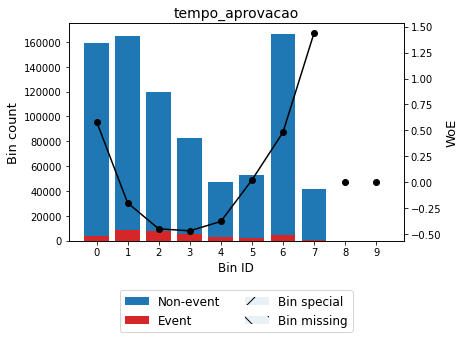

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.24750737
    IV (Jeffrey)             0.22467089
    JS (Jensen-Shannon)      0.02732111
    Hellinger                0.02768835
    Triangular               0.10663549
    KS                       0.11848553
    HHI                      0.15516380
    HHI (normalized)         0.06129311
    Cramer's V               0.08885553
    Quality score            0.53263610

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1  1610.601850 0.000000e+00 0.000000e+00 1.000000e+00
        1      2   233.069106 1.276558e-52 1.592687e-91 1.000000e+00
        2      3     1.130485 2.876719e-01 1.441062e-01 8.558938e-01
        3      4    14.089076 1.743534e-04 9.999723e-01 2.771811e-05
        4      5   186.806134 1.5

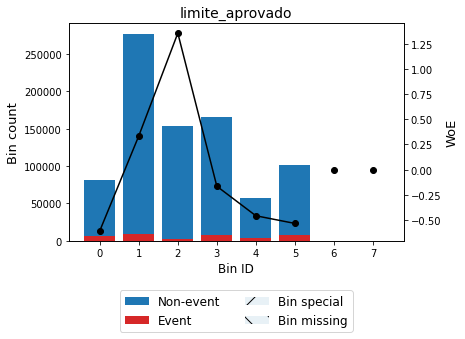

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.29955962
    IV (Jeffrey)             0.34027048
    JS (Jensen-Shannon)      0.04065041
    Hellinger                0.04155455
    Triangular               0.15614505
    KS                       0.15816374
    HHI                      0.21208744
    HHI (normalized)         0.09952850
    Cramer's V               0.10687828
    Quality score            0.88178877

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]     P[B > A]
        0      1  3148.668083 0.000000e+00  1.000000e+00 1.110223e-16
        1      2  1579.344673 0.000000e+00  1.000000e+00 1.110223e-16
        2      3  3823.633041 0.000000e+00  0.000000e+00 1.000000e+00
        3      4   205.663681 1.213316e-46 1.447532e-116 1.000000e+00
        4      5    13.11237

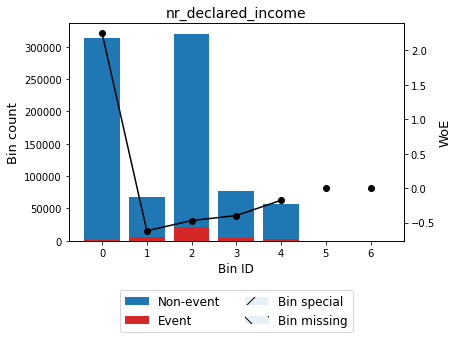

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.37884950
    IV (Jeffrey)             0.95242417
    JS (Jensen-Shannon)      0.10231715
    Hellinger                0.10978101
    Triangular               0.36458583
    KS                       0.34931255
    HHI                      0.30790907
    HHI (normalized)         0.19256059
    Cramer's V               0.14635876
    Quality score            0.17697507

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1 16428.259430 0.000000e+00       0.0 1.000000e+00
        1      2    84.176351 4.525517e-20       1.0 1.110223e-16
        2      3    18.678546 1.547135e-05       1.0 1.461775e-08
        3      4    82.044075 1.330855e-19       1.0 1.110223e-16



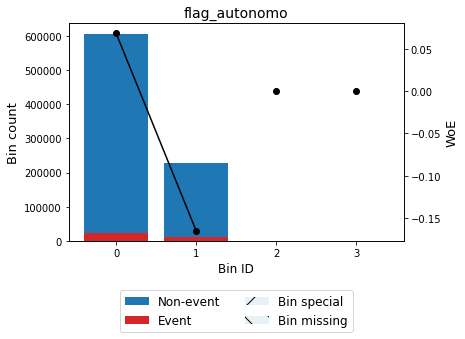

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.04865327
    IV (Jeffrey)             0.01141189
    JS (Jensen-Shannon)      0.00142525
    Hellinger                0.00142587
    Triangular               0.00569610
    KS                       0.04865327
    HHI                      0.60374785
    HHI (normalized)         0.47166380
    Cramer's V               0.02185028
    Quality score            0.02510880

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   398.600689 1.110576e-88 3.744872e-236       1.0



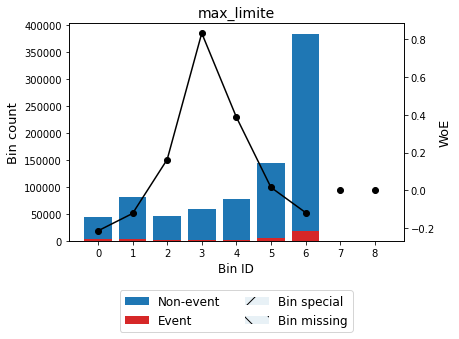

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.10200286
    IV (Jeffrey)             0.05718285
    JS (Jensen-Shannon)      0.00702161
    Hellinger                0.00708374
    Triangular               0.02761182
    KS                       0.05647102
    HHI                      0.27052968
    HHI (normalized)         0.17934589
    Cramer's V               0.04277364
    Quality score            0.19332957

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1    11.323948 7.651386e-04 9.996478e-01 3.522078e-04
        1      2    88.019503 6.481225e-21 1.000000e+00 1.110223e-16
        2      3   289.815475 5.454596e-65 1.000000e+00 1.110223e-16
        3      4   141.665154 1.151060e-32 1.485578e-43 1.000000e+00
        4      5   216.588518 5.0

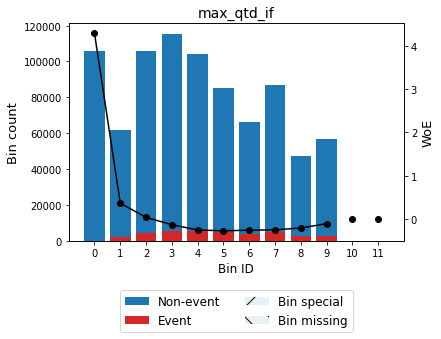

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.20070815
    IV (Jeffrey)             0.60557320
    JS (Jensen-Shannon)      0.04732690
    Hellinger                0.05724227
    Triangular               0.14943715
    KS                       0.15832106
    HHI                      0.10760947
    HHI (normalized)         0.02648306
    Cramer's V               0.08537628
    Quality score            0.05546211

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1  2913.287511 0.000000e+00 0.000000e+00  1.000000
        1      2   131.297899 2.131021e-30 3.643574e-38  1.000000
        2      3    66.830572 2.958738e-16 7.257070e-21  1.000000
        3      4    37.600661 8.681505e-10 4.196317e-12  1.000000
        4      5     0.981841 3.217447e-01 1.610

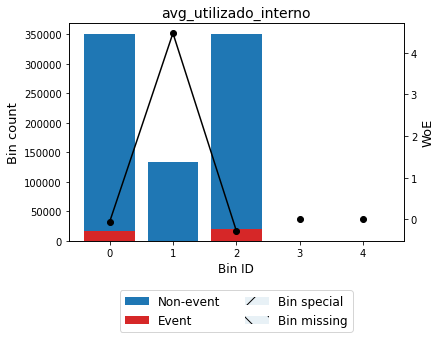

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.20780198
    IV (Jeffrey)             0.77652396
    JS (Jensen-Shannon)      0.05811510
    Hellinger                0.07139366
    Triangular               0.18061411
    KS                       0.13355375
    HHI                      0.37856331
    HHI (normalized)         0.22320414
    Cramer's V               0.09260326
    Quality score            0.36654094

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  5992.316912      0.0       1.0 1.110223e-16
        1      2  7391.631708      0.0       0.0 1.000000e+00



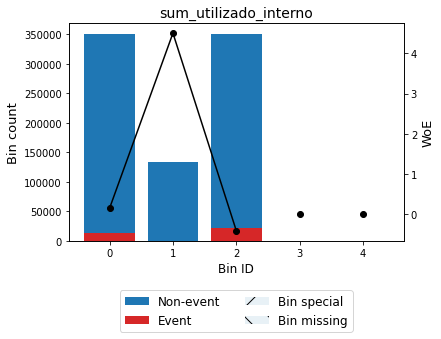

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.27884262
    IV (Jeffrey)             0.84194533
    JS (Jensen-Shannon)      0.06569635
    Hellinger                0.07913420
    Triangular               0.21041855
    KS                       0.21815007
    HHI                      0.37861092
    HHI (normalized)         0.22326365
    Cramer's V               0.10764513
    Quality score            0.28340428

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1   4857.35057      0.0       1.0 1.110223e-16
        1      2   8559.96833      0.0       0.0 1.000000e+00



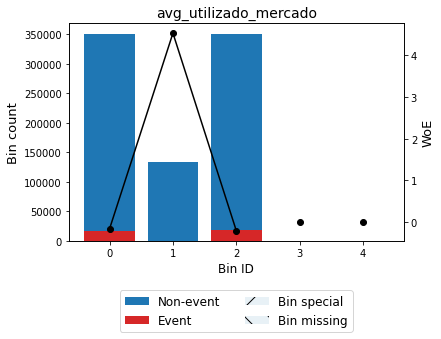

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.17436519
    IV (Jeffrey)             0.77476363
    JS (Jensen-Shannon)      0.05708994
    Hellinger                0.07055642
    Triangular               0.17617329
    KS                       0.09379557
    HHI                      0.37860347
    HHI (normalized)         0.22325434
    Cramer's V               0.09001836
    Quality score            0.36888853

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  6535.483704      0.0       1.0 1.110223e-16
        1      2  6849.727570      0.0       0.0 1.000000e+00



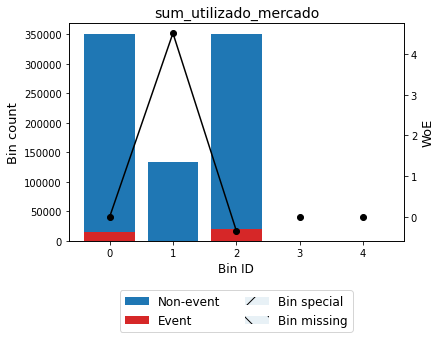

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.23362485
    IV (Jeffrey)             0.79734454
    JS (Jensen-Shannon)      0.06014246
    Hellinger                0.07356320
    Triangular               0.18838484
    KS                       0.16433164
    HHI                      0.37856075
    HHI (normalized)         0.22320094
    Cramer's V               0.09674184
    Quality score            0.33898434

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  5583.110603      0.0       1.0 1.110223e-16
        1      2  7818.428916      0.0       0.0 1.000000e+00



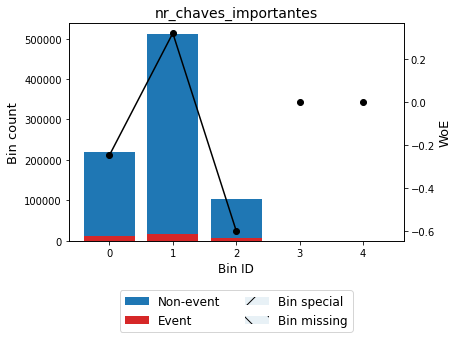

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.18728285
    IV (Jeffrey)             0.13125868
    JS (Jensen-Shannon)      0.01626523
    Hellinger                0.01633577
    Triangular               0.06450864
    KS                       0.09797465
    HHI                      0.46082643
    HHI (normalized)         0.32603304
    Cramer's V               0.07611725
    Quality score            0.34883215

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1   2101.52637      0.0       1.0 1.110223e-16
        1      2   4321.05347      0.0       0.0 1.000000e+00



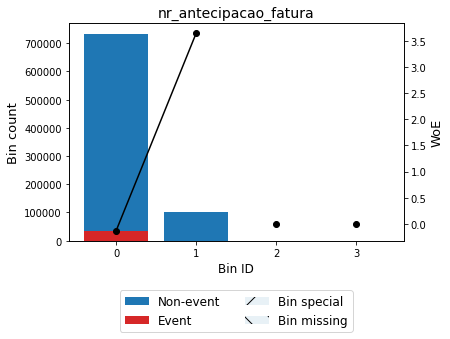

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.12284257
    IV (Jeffrey)             0.46361515
    JS (Jensen-Shannon)      0.03919273
    Hellinger                0.04633049
    Triangular               0.12464051
    KS                       0.12284257
    HHI                      0.78724656
    HHI (normalized)         0.71632874
    Cramer's V               0.07529071
    Quality score            0.27585881

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  4732.677336      0.0       1.0 1.110223e-16



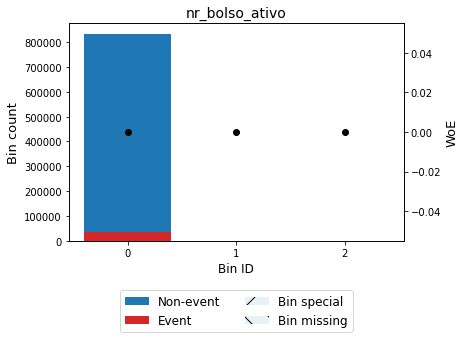

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.00000000
    IV (Jeffrey)             0.00000000
    JS (Jensen-Shannon)      0.00000000
    Hellinger                0.00000000
    Triangular               0.00000000
    KS                       0.00000000
    HHI                      1.00000000
    HHI (normalized)         1.00000000
    Cramer's V               0.00000000
    Quality score            0.00000000

  Monotonic trend             undefined

  Significance tests

    None



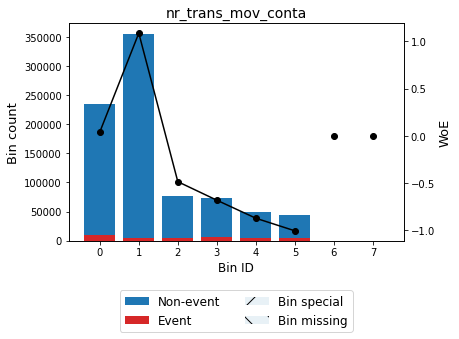

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.39602092
    IV (Jeffrey)             0.55263325
    JS (Jensen-Shannon)      0.06639304
    Hellinger                0.06770148
    Triangular               0.25586095
    KS                       0.30149720
    HHI                      0.28336751
    HHI (normalized)         0.18099143
    Cramer's V               0.14815936
    Quality score            0.71122231

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1  3870.681159 0.000000e+00 1.000000e+00 1.110223e-16
        1      2  7297.368938 0.000000e+00 0.000000e+00 1.000000e+00
        2      3    97.438570 5.555330e-23 3.396401e-32 1.000000e+00
        3      4    85.501332 2.315455e-20 7.126863e-32 1.000000e+00
        4      5    37.096757 1.1

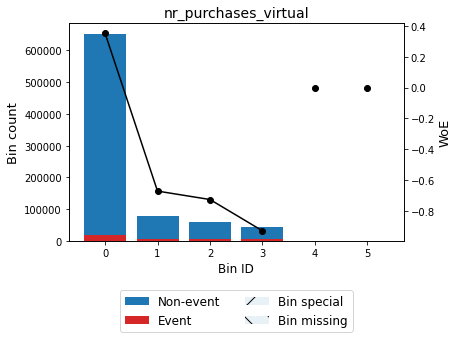

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.24066641
    IV (Jeffrey)             0.26576488
    JS (Jensen-Shannon)      0.03258151
    Hellinger                0.03289604
    Triangular               0.12792290
    KS                       0.23580421
    HHI                      0.62860409
    HHI (normalized)         0.55432491
    Cramer's V               0.11588793
    Quality score            0.39139450

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1  4992.560686 0.000000e+00 0.000000e+00  1.000000
        1      2     7.487843 6.211691e-03 2.768172e-03  0.997232
        2      3    87.068988 1.048011e-20 9.420834e-31  1.000000



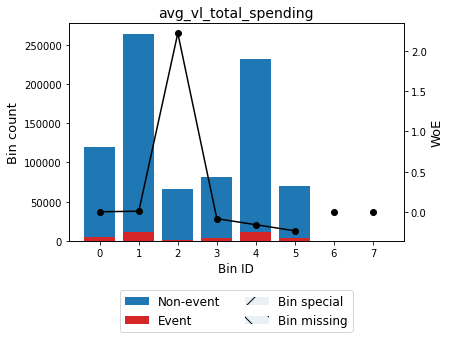

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.11717704
    IV (Jeffrey)             0.17693056
    JS (Jensen-Shannon)      0.01874071
    Hellinger                0.02024822
    Triangular               0.06592270
    KS                       0.07729267
    HHI                      0.22145985
    HHI (normalized)         0.11023983
    Cramer's V               0.05749739
    Quality score            0.18979811

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1     0.169984 0.680126  0.659219 3.407814e-01
        1      2  2172.035129 0.000000  1.000000 1.110223e-16
        2      3  2281.425701 0.000000  0.000000 1.000000e+00
        3      4    14.889317 0.000114  0.000045 9.999547e-01
        4      5    14.990659 0.000108  0.000006 9.999945e-01



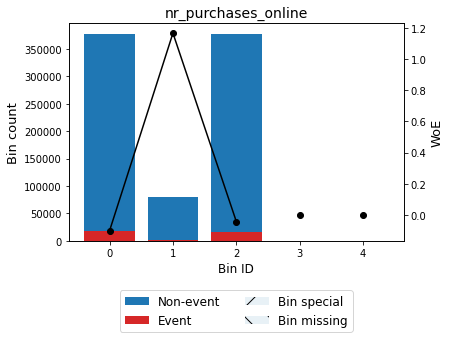

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08033130
    IV (Jeffrey)             0.08418061
    JS (Jensen-Shannon)      0.01000266
    Hellinger                0.01025416
    Triangular               0.03817963
    KS                       0.04795651
    HHI                      0.41843060
    HHI (normalized)         0.27303825
    Cramer's V               0.04630808
    Quality score            0.24925080

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  1798.115462      0.0       1.0 1.110223e-16
        1      2  1610.218538      0.0       0.0 1.000000e+00



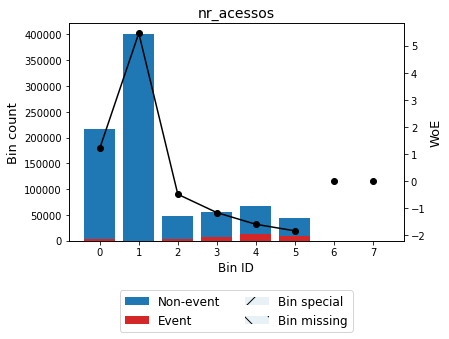

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.77677786
    IV (Jeffrey)             4.01913757
    JS (Jensen-Shannon)      0.31414975
    Hellinger                0.37256892
    Triangular               1.03472974
    KS                       0.68714357
    HHI                      0.31629153
    HHI (normalized)         0.21861889
    Cramer's V               0.34294748
    Quality score            0.00000000

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]     P[B > A]
        0      1  4931.566625  0.000000e+00  1.000000e+00 1.110223e-16
        1      2 26260.846154  0.000000e+00  0.000000e+00 1.000000e+00
        2      3   940.228275 1.765578e-206  0.000000e+00 1.000000e+00
        3      4   716.026636 9.787291e-158 1.422666e-247 1.000000e+00
        4      5   252.

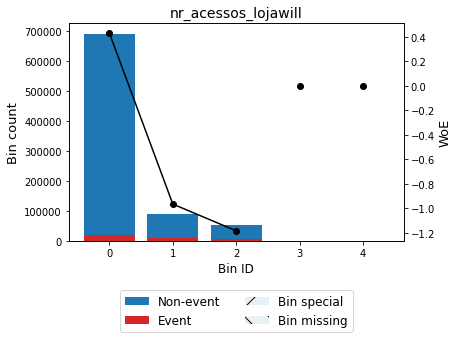

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.29804090
    IV (Jeffrey)             0.43953123
    JS (Jensen-Shannon)      0.05302857
    Hellinger                0.05395862
    Triangular               0.20524408
    KS                       0.29433595
    HHI                      0.70378773
    HHI (normalized)         0.62973467
    Cramer's V               0.15800945
    Quality score            0.36591150

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1 12915.709915 0.000000e+00 0.000000e+00       1.0
        1      2   161.759330 4.669481e-37 1.240830e-68       1.0



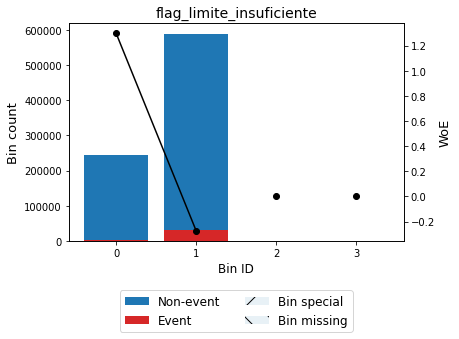

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.21985456
    IV (Jeffrey)             0.34567620
    JS (Jensen-Shannon)      0.04087384
    Hellinger                0.04199538
    Triangular               0.15548968
    KS                       0.21985456
    HHI                      0.58549960
    HHI (normalized)         0.44733281
    Cramer's V               0.09653922
    Quality score            0.54348744

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1   7780.93283      0.0       0.0       1.0



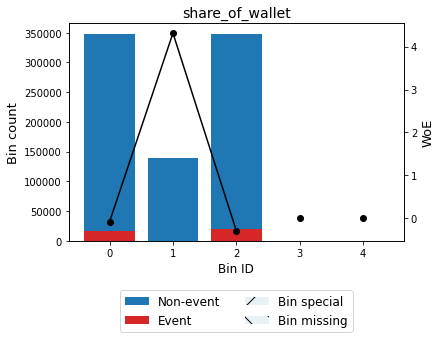

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.21473771
    IV (Jeffrey)             0.78093850
    JS (Jensen-Shannon)      0.06006510
    Hellinger                0.07315439
    Triangular               0.18780462
    KS                       0.13770277
    HHI                      0.37511163
    HHI (normalized)         0.21888954
    Cramer's V               0.09470669
    Quality score            0.36262420

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  6250.673459      0.0       1.0 1.110223e-16
        1      2  7743.532179      0.0       0.0 1.000000e+00



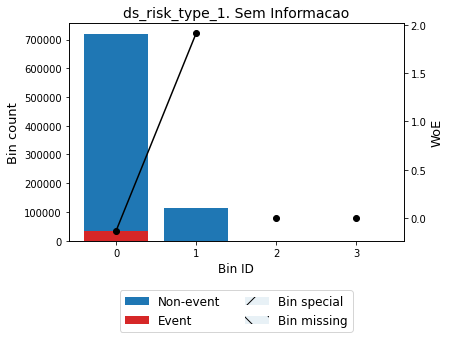

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.12100969
    IV (Jeffrey)             0.24755529
    JS (Jensen-Shannon)      0.02720302
    Hellinger                0.02891983
    Triangular               0.09786833
    KS                       0.12100969
    HHI                      0.76367813
    HHI (normalized)         0.68490417
    Cramer's V               0.07037185
    Quality score            0.26722701

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1  4134.490846      0.0       1.0 1.110223e-16



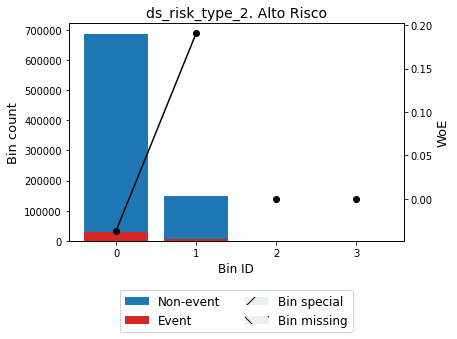

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.03076506
    IV (Jeffrey)             0.00699515
    JS (Jensen-Shannon)      0.00087328
    Hellinger                0.00087383
    Triangular               0.00348866
    KS                       0.03076506
    HHI                      0.71002167
    HHI (normalized)         0.61336223
    Cramer's V               0.01615124
    Quality score            0.01126606

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     217.7889 2.745945e-49       1.0 1.110223e-16



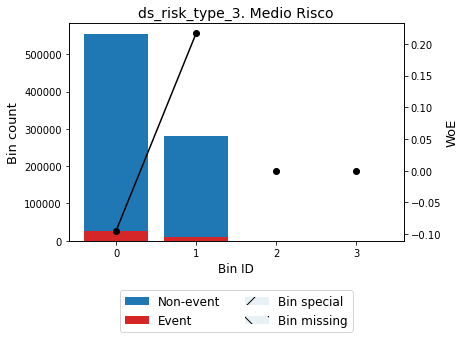

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06582246
    IV (Jeffrey)             0.02050979
    JS (Jensen-Shannon)      0.00255994
    Hellinger                0.00256183
    Triangular               0.01022473
    KS                       0.06582246
    HHI                      0.55452022
    HHI (normalized)         0.40602696
    Cramer's V               0.02787988
    Quality score            0.05068544

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1   648.942003 3.794940e-143       1.0 1.110223e-16



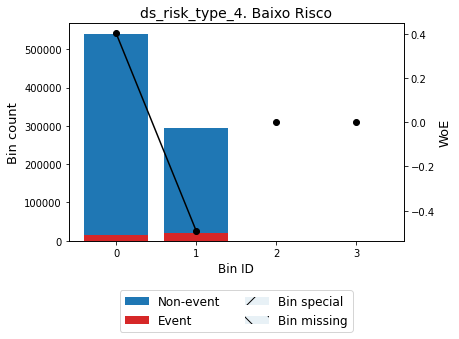

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.21759721
    IV (Jeffrey)             0.19441674
    JS (Jensen-Shannon)      0.02409623
    Hellinger                0.02419862
    Triangular               0.09557862
    KS                       0.21759721
    HHI                      0.54365622
    HHI (normalized)         0.39154162
    Cramer's V               0.09106218
    Quality score            0.43681173

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1  6923.093221      0.0       0.0       1.0



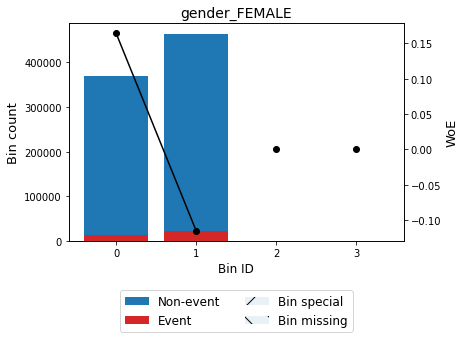

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06768238
    IV (Jeffrey)             0.01893681
    JS (Jensen-Shannon)      0.00236499
    Hellinger                0.00236605
    Triangular               0.00945157
    KS                       0.06768238
    HHI                      0.50639080
    HHI (normalized)         0.34185440
    Cramer's V               0.02723421
    Quality score            0.05186449

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]  P[B > A]
        0      1   619.232376 1.098279e-136 4.772653e-210       1.0



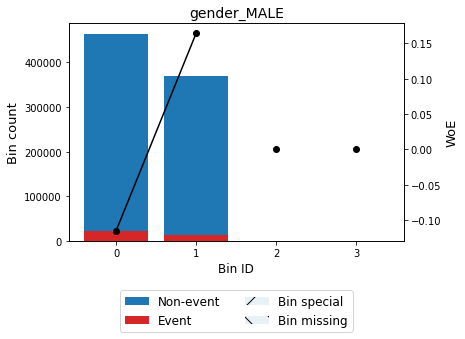

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06768238
    IV (Jeffrey)             0.01893681
    JS (Jensen-Shannon)      0.00236499
    Hellinger                0.00236605
    Triangular               0.00945157
    KS                       0.06768238
    HHI                      0.50639080
    HHI (normalized)         0.34185440
    Cramer's V               0.02723421
    Quality score            0.05186449

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1   619.232376 1.098279e-136       1.0 1.110223e-16



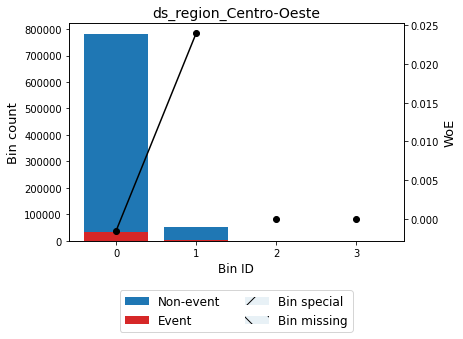

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.00148111
    IV (Jeffrey)             0.00003790
    JS (Jensen-Shannon)      0.00000474
    Hellinger                0.00000474
    Triangular               0.00001895
    KS                       0.00148111
    HHI                      0.88303682
    HHI (normalized)         0.84404909
    Cramer's V               0.00122432
    Quality score            0.00001814

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     1.251441 0.263277  0.870473  0.129527



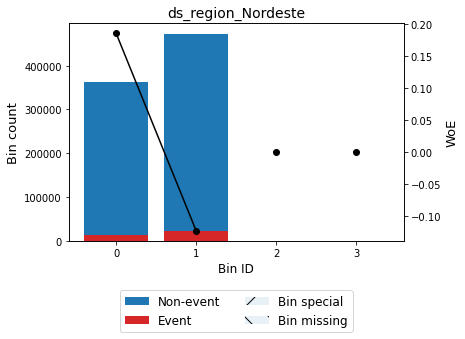

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07383135
    IV (Jeffrey)             0.02277001
    JS (Jensen-Shannon)      0.00284309
    Hellinger                0.00284467
    Triangular               0.01135977
    KS                       0.07383135
    HHI                      0.50884975
    HHI (normalized)         0.34513300
    Cramer's V               0.02978272
    Quality score            0.06202061

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]  P[B > A]
        0      1   740.547426 4.557731e-163 1.119486e-249       1.0



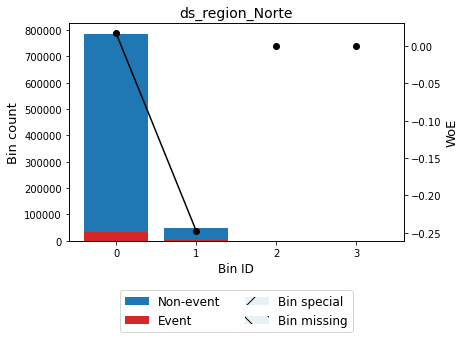

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.01594652
    IV (Jeffrey)             0.00421709
    JS (Jensen-Shannon)      0.00052588
    Hellinger                0.00052651
    Triangular               0.00209854
    KS                       0.01594652
    HHI                      0.89165405
    HHI (normalized)         0.85553874
    Cramer's V               0.01369590
    Quality score            0.00253792

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]  P[B > A]
        0      1   156.604778 6.244703e-36       0.0       1.0



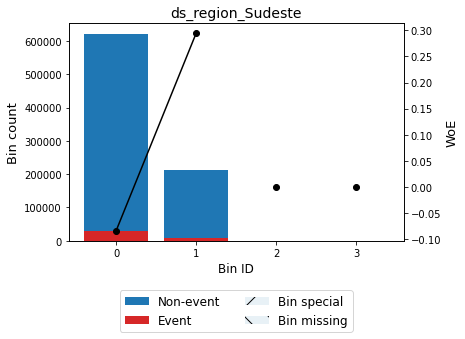

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06576559
    IV (Jeffrey)             0.02497170
    JS (Jensen-Shannon)      0.00311251
    Hellinger                0.00311698
    Triangular               0.01241455
    KS                       0.06576559
    HHI                      0.62023248
    HHI (normalized)         0.49364331
    Cramer's V               0.03016968
    Quality score            0.05257492

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1    759.91556 2.801692e-167       1.0 1.110223e-16



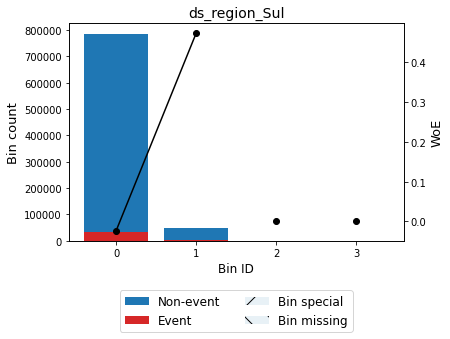

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.02253117
    IV (Jeffrey)             0.01119705
    JS (Jensen-Shannon)      0.00138733
    Hellinger                0.00139344
    Triangular               0.00550117
    KS                       0.02253117
    HHI                      0.88928305
    HHI (normalized)         0.85237741
    Cramer's V               0.01914289
    Quality score            0.00688369

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1   305.941893 1.672147e-68       1.0 1.110223e-16



In [25]:
#optimal binning
from optbinning import OptimalBinning
from optbinning import BinningProcess

binning_process = BinningProcess(variable_names=list(preditores))
binning_process.fit(x_train[preditores], y_train[target[0]])

for i in preditores:
    optb = binning_process.get_binned_variable(name=i)
    optb.binning_table.plot()
    optb.binning_table.analysis()


In [26]:
#para ver as faixas
for i in preditores:
    optb = binning_process.get_binned_variable(name=i)
    print(i)
    print(optb.binning_table.build())
    print('--------------')

tempo_aprovacao
                  Bin   Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 0.50)  159120   0.190590     155354   3766    0.023668   
1        [0.50, 1.50)  164713   0.197289     156414   8299    0.050385   
2        [1.50, 2.50)  119687   0.143358     112061   7626    0.063716   
3        [2.50, 3.50)   82378   0.098670      77032   5346    0.064896   
4        [3.50, 4.50)   47157   0.056484      44345   2812    0.059631   
5        [4.50, 6.50)   53153   0.063665      50982   2171    0.040844   
6       [6.50, 63.50)  166671   0.199635     162307   4364    0.026183   
7        [63.50, inf)   42001   0.050308      41571    430    0.010238   
8             Special       0   0.000000          0      0    0.000000   
9             Missing       0   0.000000          0      0    0.000000   
Totals                 834880   1.000000     800066  34814    0.041699   

             WoE        IV        JS  
0       0.585018  0.050313  0.006201  
1      -0.198303 

In [27]:
def limite_aprov(x):
    if x <= 700:
       return 0
    elif x > 700:
       return 1
     
def antecip(x):
   if x == 0:
      return 0
   else:
      return 1

def loja_will(x):
   if x == 0:
      return 0
   else:
      return 1

In [28]:
x_train['flag_limite_aprov'] = x_train['limite_aprovado'].apply(limite_aprov)
x_train['flag_antecip'] = x_train['nr_antecipacao_fatura'].apply(antecip)
x_train['flag_lojawill'] = x_train['nr_acessos_lojawill'].apply(loja_will)

In [29]:
x_test['flag_limite_aprov'] = x_test['limite_aprovado'].apply(limite_aprov)
x_test['flag_antecip'] = x_test['nr_antecipacao_fatura'].apply(antecip)
x_test['flag_lojawill'] = x_test['nr_acessos_lojawill'].apply(loja_will)

In [30]:
pcaComp = PCA(n_components = 0.99)
pcaModel = pcaComp.fit(x_train)
x_train_reduced = pcaModel.transform(x_train)

In [31]:
x_train.shape[1]

35

In [32]:
x_train_reduced.shape[1]

1

In [33]:
pcaComp = PCA(n_components = 2)
pcaModel = pcaComp.fit(x_train)
x_train_reduced = pcaModel.transform(x_train)

In [34]:
x_train_reduced.shape[1]

2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


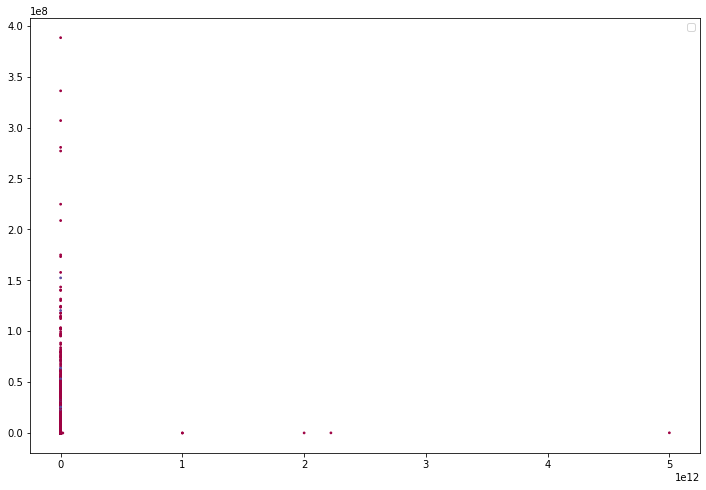

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], s=3, c=y_train['flag_mgm'], cmap='Spectral')
plt.legend()

In [36]:
scaler = pr.RobustScaler().fit(x_train) #para outliers

#aplicando scaler definido
x_train_nr = scaler.fit_transform(x_train)
pcaModel = pcaComp.fit(x_train_nr)
x_train_reduced = pcaModel.transform(x_train_nr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


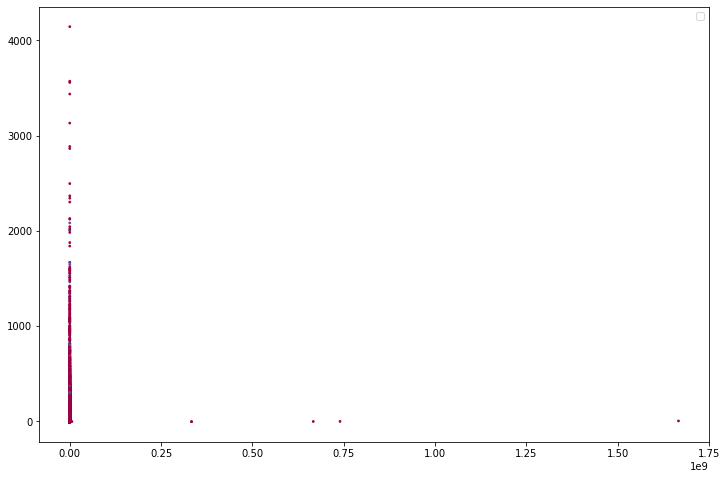

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], s=3, c=y_train['flag_mgm'], cmap='Spectral')
plt.legend()

In [57]:
#ALGORITMO
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, random_state=0).fit(x_train_reduced)
cluster = kmeans.predict(x_train_reduced)

In [58]:
df_cluster = pd.DataFrame()
df_cluster['cluster'] = cluster
df_cluster['target'] = y_train['flag_mgm']


df_cluster.cluster.value_counts()

94    302192
0     175010
77    104913
67     70837
37     61567
       ...  
70         1
28         1
53         1
7          1
15         1
Name: cluster, Length: 100, dtype: int64

In [60]:
df_cluster.groupby('cluster').agg({'target':['mean', 'count']})

target        
             mean   count
cluster                  
0        0.051706  139983
1        0.000000       1
2        0.000000       1
3             NaN       0
4        0.000000       1
...           ...     ...
95       0.000000       1
96       0.000000       6
97       0.000000       2
98       0.200000       5
99       0.051480    5439

[100 rows x 2 columns]

In [61]:
df_cluster.groupby('cluster').agg({'target':['mean', 'count']}).to_csv('taxa_mgm_cluster.csv')

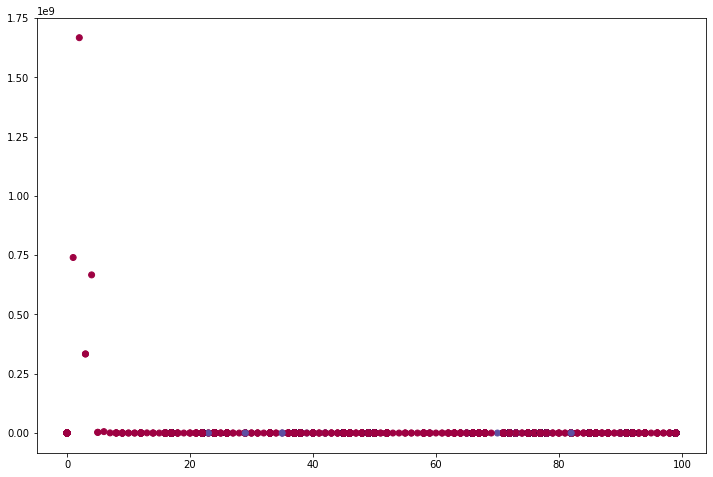

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(df_cluster.cluster, x_train_reduced[:, 0], c=y_train['flag_mgm'], cmap='Spectral')
plt.show()

In [66]:
df_cluster = df_cluster.join(x_train)

In [70]:
df_cluster.groupby('cluster').mean().to_csv('taxa_mgm_variables.csv')

In [38]:
'''
def tsne_plot(x1, y1):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Event')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Event')

    plt.legend(loc='best')
    plt.show()

    '''


"\ndef tsne_plot(x1, y1):\n    from sklearn.manifold import TSNE\n    tsne = TSNE(n_components=2, random_state=0)\n    X_t = tsne.fit_transform(x1)\n\n    plt.figure(figsize=(12, 8))\n    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Event')\n    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Event')\n\n    plt.legend(loc='best')\n    plt.show()\n\n    "

In [71]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train_reduced, y_train)

#validação inicial por cross validation
scores = cross_val_score(clf, x_train_reduced, y_train, scoring='f1_macro' , cv = StratifiedKFold(n_splits=3))
print("%0.2f F1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


/tmp/ipykernel_1657335/3784011413.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_reduced, y_train)
/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array w

0.53 F1 with a standard deviation of 0.00


In [ ]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train, y_train)

In [73]:
#validação inicial por cross validation
scores = cross_val_score(clf, x_train, y_train, scoring='f1_macro' , cv = StratifiedKFold(n_splits=3))
print("%0.2f F1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/flavia.costa/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.49 F1 with a standard deviation of 0.00


In [74]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42) #early_stopping_rounds=2
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [75]:
#validação inicial por cross validation
scores = cross_val_score(xgb_model, x_train, y_train, scoring='f1_macro' , cv = StratifiedKFold(n_splits=5))
print("%0.2f F1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.50 F1 with a standard deviation of 0.00


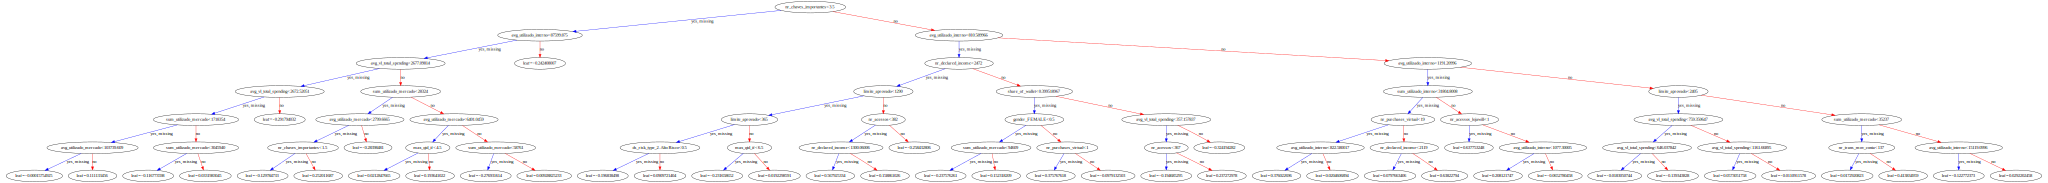

In [76]:
import graphviz

xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

<Figure size 1440x1440 with 0 Axes>

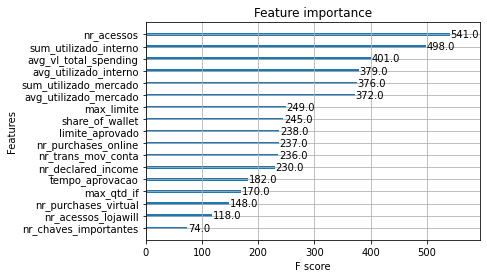

In [85]:
plt.figure(figsize=(20,20
                    ))
xgb.plot_importance(xgb_model, max_num_features=17)
plt.show()

In [ ]:
# Verificar correlações das variáveis principais e eliminar algumas - ok
# Nova query com tempo de relacionamento e retirando inadimplentes - ok
# acrescentar percentual loja will
# acrescentar dif ganho limite  (max_limite - limite_aprovado)
# Das atuais manter  apenas nr_acessos, share of wallet, declared income,  purchases on line, max_limite, Avg Spending, trans mov conta, limite insuficiente
# Rodar novamente com RF e XGBoost
# Grupos com segmentação - quais estão associados com alto mgm?
